# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

- In this project, we will use Natural Language Processing (NLP) techniques to predict customer sentiment from real customer reviews.

- AI/ML-based sentiment analysis is crucial for companies to automatically predict whether their customers are happy or not.

- The process could be done automatically without having humans manually review thousands of customer reviews.

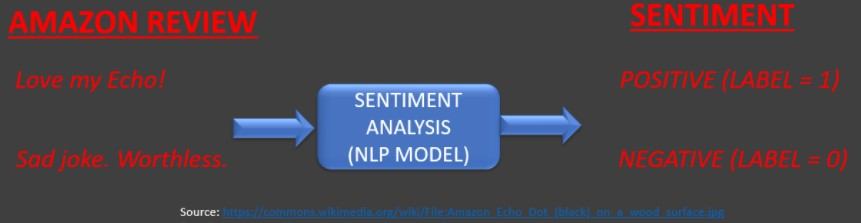

data source: https://raw.githubusercontent.com/Dong2Yo/Dataset/main/Wk8_Reviews.csv

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data
reviews_df = pd.read_csv('https://raw.githubusercontent.com/Dong2Yo/Dataset/main/Wk8_Reviews.csv')
reviews_df

,ProductID,Product,Stars,Title,Review
0,392,Maximus RP-01,5,Great ride!,Just bought this bike. Tested it out for and h...
1,392,Maximus RP-01,5,Best light weight commuter road bike under 21 lbs,I searched for a while for a road bike that wa...
2,392,Maximus RP-01,5,great bike for the city and more,This is my first route bike so it may not be t...
3,394,Maximus RS-01,5,Great Bike!,"Completed 60 mils on this bike, great bike. Ge..."
4,405,Maximus UM-10,5,Great bike,"On the flats I avg 14.5 to 16mph, small uphill..."
...,...,...,...,...,...
85,647,Maximus UC-12,5,Ottima bici per lunghe distanze,Ho comprato la versione degli ultimi anni di q...
86,647,Maximus UC-12,5,Beaucoup de grandes fonctionnalités,"Dans l’ensemble, je donne à ce vélo 4,5 étoile..."
87,659,Maximus UC-24,5,Tough touring bike,Took this little number on it's first ride dow...
88,659,Maximus UC-24,1,Bottom bracket broke,Bought this bike for a pacific coast bike tour...


In [3]:
# View the DataFrame Information
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ProductID  90 non-null     int64 
 1   Product    90 non-null     object
 2   Stars      90 non-null     int64 
 3   Title      90 non-null     object
 4   Review     90 non-null     object
dtypes: int64(2), object(3)
memory usage: 3.6+ KB


In [4]:
# View DataFrame Statistical Summary
reviews_df.describe()

,ProductID,Stars
count,90.000000,90.000000
mean,534.422222,4.033333
std,78.665267,1.275966
min,392.000000,1.000000
25%,513.000000,4.000000
50%,535.000000,4.500000
75%,559.000000,5.000000
max,659.000000,5.000000


In [5]:
reviews_df.columns

Index(['ProductID', 'Product', 'Stars', 'Title', 'Review'], dtype='object')

# TASK #3: PERFORM DATA VISUALIZATION

In [6]:
# Ensure that there is no missing data
reviews_df.isnull()

,ProductID,Product,Stars,Title,Review
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
85,False,False,False,False,False
86,False,False,False,False,False
87,False,False,False,False,False
88,False,False,False,False,False


__True__ means null value. __False__ means not null value.

<AxesSubplot: >

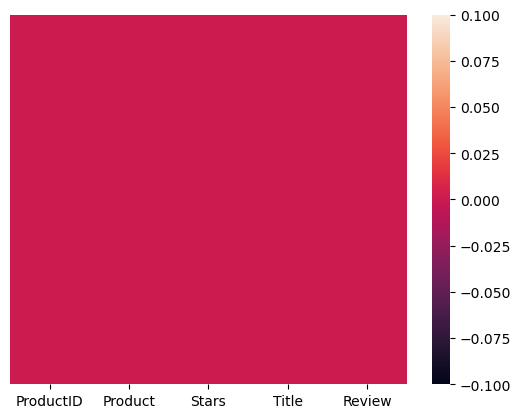

In [7]:
# Visualize the missing data
sns.heatmap(reviews_df.isnull(), yticklabels=False)

The visual above indicates there is no missing values.

<AxesSubplot: xlabel='Stars', ylabel='count'>

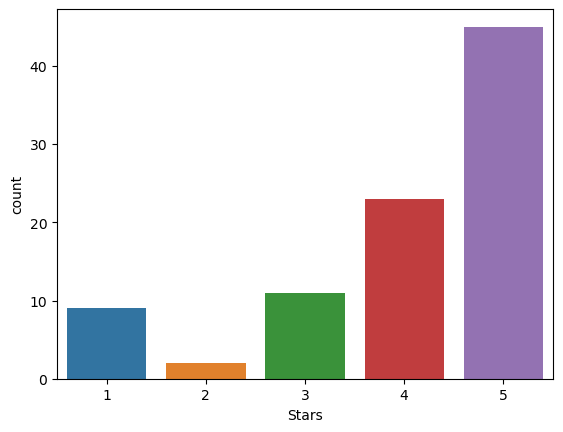

In [8]:
# Plot the count plot for the ratings
sns.countplot(x = reviews_df['Stars'])

Here we see that we have five unique categories in __Stars__ column.

And what we got here is the count on how many rows per category.


- **Plot the countplot for the Product column**

<AxesSubplot: xlabel='ProductID', ylabel='count'>

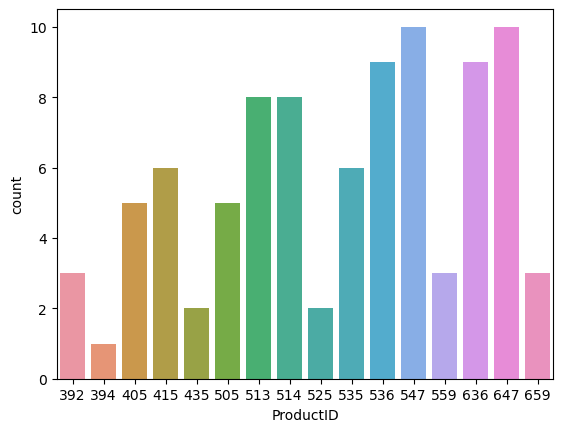

In [9]:
sns.countplot(x = reviews_df['ProductID'])

# TASK #4: PERFORM DATA EXPLORATION

In [10]:
# Let's get the length of the Review column
reviews_df['Length'] = reviews_df['Review'].apply(len)

In [11]:
reviews_df

,ProductID,Product,Stars,Title,Review,Length
0,392,Maximus RP-01,5,Great ride!,Just bought this bike. Tested it out for and h...,214
1,392,Maximus RP-01,5,Best light weight commuter road bike under 21 lbs,I searched for a while for a road bike that wa...,464
2,392,Maximus RP-01,5,great bike for the city and more,This is my first route bike so it may not be t...,244
3,394,Maximus RS-01,5,Great Bike!,"Completed 60 mils on this bike, great bike. Ge...",82
4,405,Maximus UM-10,5,Great bike,"On the flats I avg 14.5 to 16mph, small uphill...",572
...,...,...,...,...,...,...
85,647,Maximus UC-12,5,Ottima bici per lunghe distanze,Ho comprato la versione degli ultimi anni di q...,444
86,647,Maximus UC-12,5,Beaucoup de grandes fonctionnalités,"Dans l’ensemble, je donne à ce vélo 4,5 étoile...",574
87,659,Maximus UC-24,5,Tough touring bike,Took this little number on it's first ride dow...,590
88,659,Maximus UC-24,1,Bottom bracket broke,Bought this bike for a pacific coast bike tour...,644


In [12]:
reviews_df.sort_values(by = "Length", ascending = False)

,ProductID,Product,Stars,Title,Review,Length
35,514,Maximus UE-02,3,Good base for upgrades,Overall handling is very good and especially s...,1839
73,636,Maximus UC-01,3,Too slow for the road,"I really wanted to like this bike, but I just ...",1754
51,536,Maximus UC-01,3,Too slow for the road,"I really wanted to like this bike, but I just ...",1754
81,647,Maximus UC-12,4,A Nice Ride,This will just be my initial impression of the...,1392
59,547,Maximus UC-12,4,A Nice Ride,This will just be my initial impression of the...,1392
...,...,...,...,...,...,...
38,525,Maximus UE-13,3,correction on specs,"Cannondale website says the shifters are 3x7 ""...",74
39,525,Maximus UE-13,4,Great Bike!,"This bike is amazing, it's a smoth ride and re...",64
40,535,Maximus UE-23,4,Hidden gem,Nice bike just needs a few little tweeks to be...,58
74,636,Maximus UC-01,5,Lovely bike,"Madly in love with this bike, using for commut...",56


<AxesSubplot: ylabel='Frequency'>

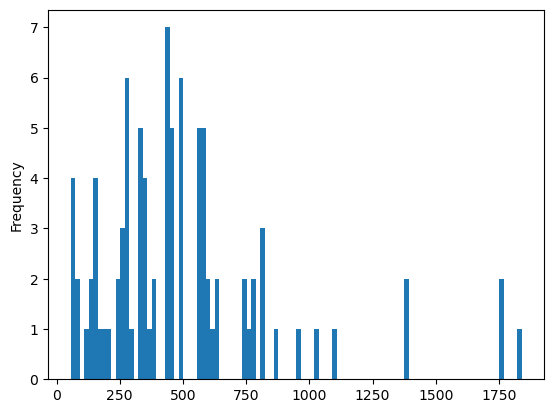

In [13]:
# Plot the histogram for the length
reviews_df['Length'].plot(bins = 100, kind = 'hist')

What we notice is a lot of reviews are
actually quite short. Meaning they are like range
between maybe zero and let's say for example,
50.
This essentially indicate that a lot of reviews are
quite relatively short.


And there is some people, some customers who maybe love
the product so much.
So they decided to leave a ton of review, just like a long
review.
Some other customers maybe they are pissed off
and they decided to leave really bad review for quite a long
as well.


In [14]:
# Apply the describe method to get statistical summary
reviews_df.describe()

,ProductID,Stars,Length
count,90.000000,90.000000,90.000000
mean,534.422222,4.033333,498.644444
std,78.665267,1.275966,359.489285
min,392.000000,1.000000,56.000000
25%,513.000000,4.000000,277.750000
50%,535.000000,4.500000,440.000000
75%,559.000000,5.000000,590.000000
max,659.000000,5.000000,1839.000000


So on average, there is 498 characters in our string.
If you want to check out the min and max the mean is
56 and the maximum is 1839.
So there is a customers who maybe love the product so much
and he wrote Almost 1839 characters.
So I'm actually curious to see what's actually going
on in there.


In [15]:
# Let's see the longest message 
reviews_df[reviews_df['Length'] == 1839.000000]

,ProductID,Product,Stars,Title,Review,Length
35,514,Maximus UE-02,3,Good base for upgrades,Overall handling is very good and especially s...,1839


In [16]:
reviews_df[reviews_df['Length'] == 1839.000000]['Review'].iloc[0]

"Overall handling is very good and especially shines when going downhill. Lots of climbing traction but a bit on the heavy side. Handlebar is narrower (740) than I'm used to (780) which in theory should make riding through tight trees.easier, but in practice the longer bar is easier to control anyway so it's easier to lean the bike to fit through. The gear range is quite limited with only 28 front and 11-42 in the back. The brakes would probably be the first to get upgraded. Nowhere near the 1-finger ease and strong bite of the XT brakes I have on my older bike. The rear shock's metal valve sticks out just enough where you can hit your knee or thigh on it on dismounts. I have already scratched my thigh on it on the first ride. The metal is pretty sharp and is also a problem on the 3.2 bike which is basically the same frame. My son has also cut his knee on the shock valve of his 3.2. The front fork makes a loud squishing sound on quick decompression which you will hear when lifting up t

- **View the message with the min length**

In [17]:
reviews_df[reviews_df['Length'] == 56.000000]['Review'].iloc[0]

'Madly in love with this bike, using for commute, so good'

# TASK #5: PLOT THE WORDCLOUD

In [18]:
from textblob import TextBlob

In [19]:
# Function to determine sensitivity
def get_sensitivity(review):
    analysis = TextBlob(review)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [20]:
# Add a new column 'sensitivity' to the DataFrame
reviews_df['Sensitivity'] = reviews_df['Review'].apply(get_sensitivity)

# Print the updated DataFrame
print(reviews_df)

    ProductID        Product  Stars  \
0         392  Maximus RP-01      5   
1         392  Maximus RP-01      5   
2         392  Maximus RP-01      5   
3         394  Maximus RS-01      5   
4         405  Maximus UM-10      5   
..        ...            ...    ...   
85        647  Maximus UC-12      5   
86        647  Maximus UC-12      5   
87        659  Maximus UC-24      5   
88        659  Maximus UC-24      1   
89        659  Maximus UC-24      2   

                                                Title  \
0                                         Great ride!   
1   Best light weight commuter road bike under 21 lbs   
2                    great bike for the city and more   
3                                         Great Bike!   
4                                          Great bike   
..                                                ...   
85                    Ottima bici per lunghe distanze   
86                Beaucoup de grandes fonctionnalités   
87                

In [23]:
# Obtain only the positive reviews
positive = reviews_df[reviews_df['Sensitivity'] == 'positive']

In [24]:
positive

,ProductID,Product,Stars,Title,Review,Length,Sensitivity
0,392,Maximus RP-01,5,Great ride!,Just bought this bike. Tested it out for and h...,214,positive
1,392,Maximus RP-01,5,Best light weight commuter road bike under 21 lbs,I searched for a while for a road bike that wa...,464,positive
2,392,Maximus RP-01,5,great bike for the city and more,This is my first route bike so it may not be t...,244,positive
3,394,Maximus RS-01,5,Great Bike!,"Completed 60 mils on this bike, great bike. Ge...",82,positive
4,405,Maximus UM-10,5,Great bike,"On the flats I avg 14.5 to 16mph, small uphill...",572,positive
...,...,...,...,...,...,...,...
82,647,Maximus UC-12,4,Smooth ride,1 week in and I'm so far liking this bike very...,457,positive
83,647,Maximus UC-12,3,Initial thoughts,I picked the bike up last night and noticed a ...,434,positive
84,647,Maximus UC-12,4,Corsa personalizzata,"Volevo una buona, robusta moto da turismo come...",342,positive
87,659,Maximus UC-24,5,Tough touring bike,Took this little number on it's first ride dow...,590,positive


In [27]:
# Obtain the negative reviews only
negative = reviews_df[reviews_df['Sensitivity'] == 'negative']

In [28]:
negative

,ProductID,Product,Stars,Title,Review,Length,Sensitivity
29,513,Maximus UE-01,3,"Buena bicicleta, pero sólo para principiantes","Calificé esto como ""promedio""-- y eso es exact...",952,negative
42,535,Maximus UE-23,5,Great trail bike,"Shaved minutes off usual loops, sold 29er and ...",135,negative
49,536,Maximus UC-01,1,Not usable for touring due to wheels.,I bought the bike about a month ago for my 600...,818,negative
50,536,Maximus UC-01,1,Spend more money on a better bike,Do not buy this bike... I use it as a commuter...,330,negative
66,559,Maximus UC-24,1,Bottom bracket broke,Bought this bike for a pacific coast bike tour...,644,negative
71,636,Maximus UC-01,1,Not usable for touring due to wheels.,I bought the bike about a month ago for my 600...,818,negative
72,636,Maximus UC-01,1,Spend more money on a better bike,Do not buy this bike... I use it as a commuter...,330,negative
88,659,Maximus UC-24,1,Bottom bracket broke,Bought this bike for a pacific coast bike tour...,644,negative


In [29]:
# Convert to list format
positive_sentences = positive['Review'].tolist()
len(positive_sentences)

68

In [30]:
# Join all reviews into one large string
postive_sentences_as_one_string = ' '.join(positive_sentences)

In [31]:
postive_sentences_as_one_string

'Just bought this bike. Tested it out for and hour before purchase and then a short 16 mile ride once home. Handled excellent!! Smooth ride and quick. A good distance ride planned for tomorrow. Totally recommended!! I searched for a while for a road bike that was around 20 lbs, with rack and fender mounts, disc brakes, Shimano 105s, 30cm or wider road tires, under $1,500. This is it! Great ride, reputable Cannondale name & build, fantastic ~$1,100 November prior-season price tag, and free rack and fender install with the purchase. This bike is the perfect commuter bike for someone who pushes it hard on long commutes in varying weather and bags full of clothing and laptop. This is my first route bike so it may not be the best review. All I can say is that it’s a very comfortable bike for the city and other roads. The shifts and breaks are awesome and overall feeling is quite good. I would definitely recommend it! Completed 60 mils on this bike, great bike. Gear shifting is smooth and go

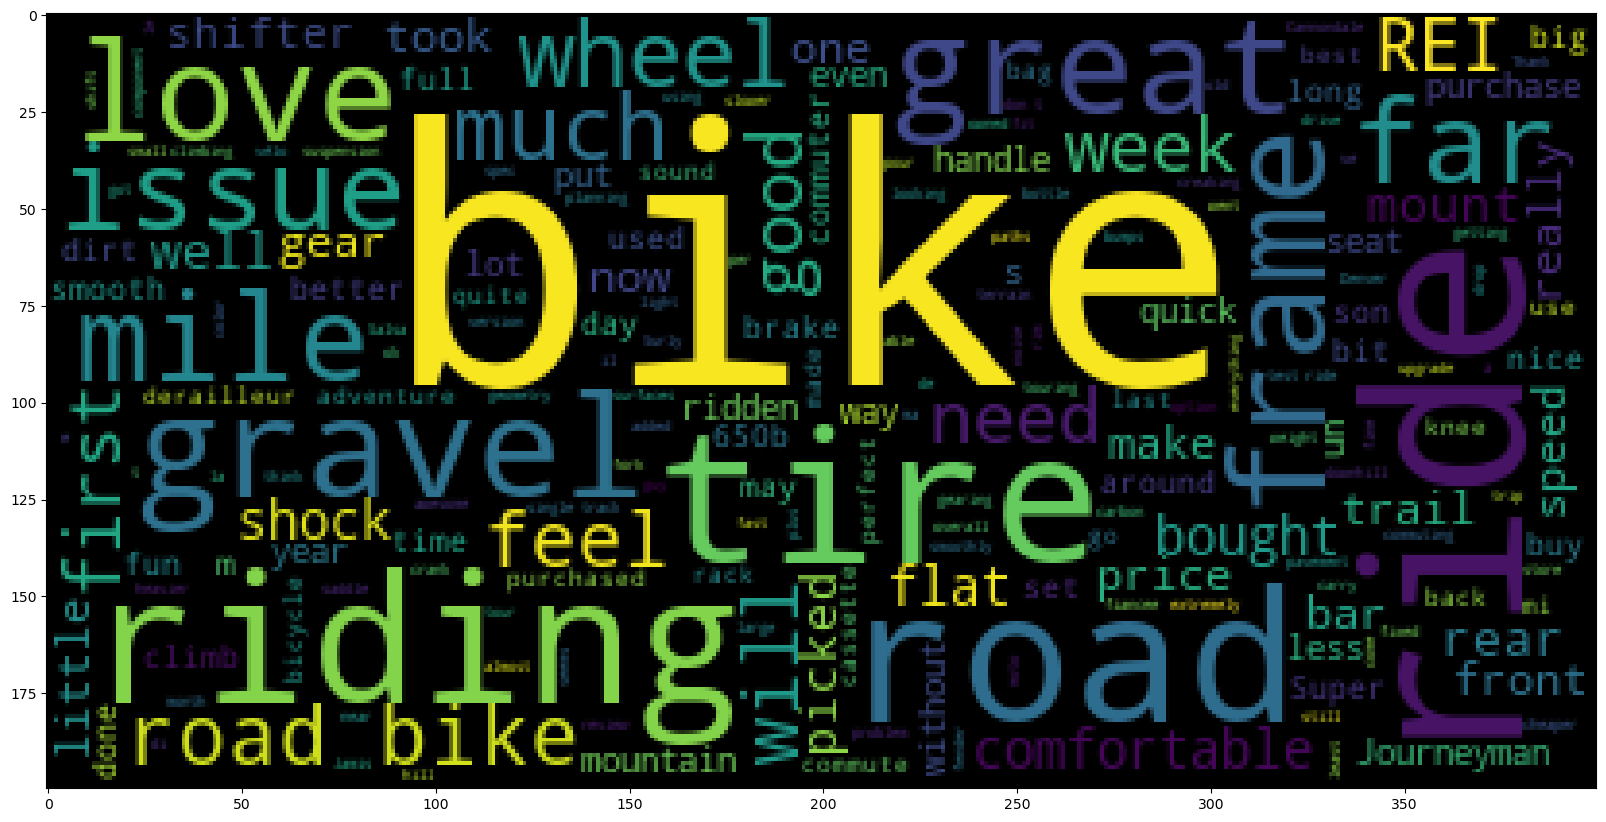

In [32]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(postive_sentences_as_one_string))

- **Plot the wordcloud of the "negative" dataframe** 

In [33]:
negative_sentences = negative['Review'].tolist()
len(negative_sentences)

8

In [34]:
negative_sentences_as_one_string = ' '.join(negative_sentences)

In [35]:
negative_sentences_as_one_string

'Calificé esto como "promedio"-- y eso es exactamente lo que es. He tenido esta bicicleta desde 2017, y es una bicicleta sólida para principiantes. esta bicicleta sobresale sobre las bicicletas de otras marcas rivales de precio similar. ventajas: frenado hidráulico, transmisión 3x8 y llantas de doble pared. los frenos hidráulicos no son los mejores de la línea, pero lo más probable es que los encuentres en una bicicleta a este precio. mediocre en el mejor de los casos. la transmisión 3x8 se adaptará a sus necesidades para paseos a través del país. Cabalgé un viaje de 67 millas, y tener los tres engranajes adicionales en la parte delantera me salvó. las llantas de doble pared son extremadamente fuertes para lo baratos que son. He enloquecido huecos, puesto una enorme fuerza lateral en las ruedas y he destruido enormes caídas. la rueda trasera tiene un ligero punto plano, pero excepto que las ruedas de esta moto están listas para la batalla. Shaved minutes off usual loops, sold 29er and 

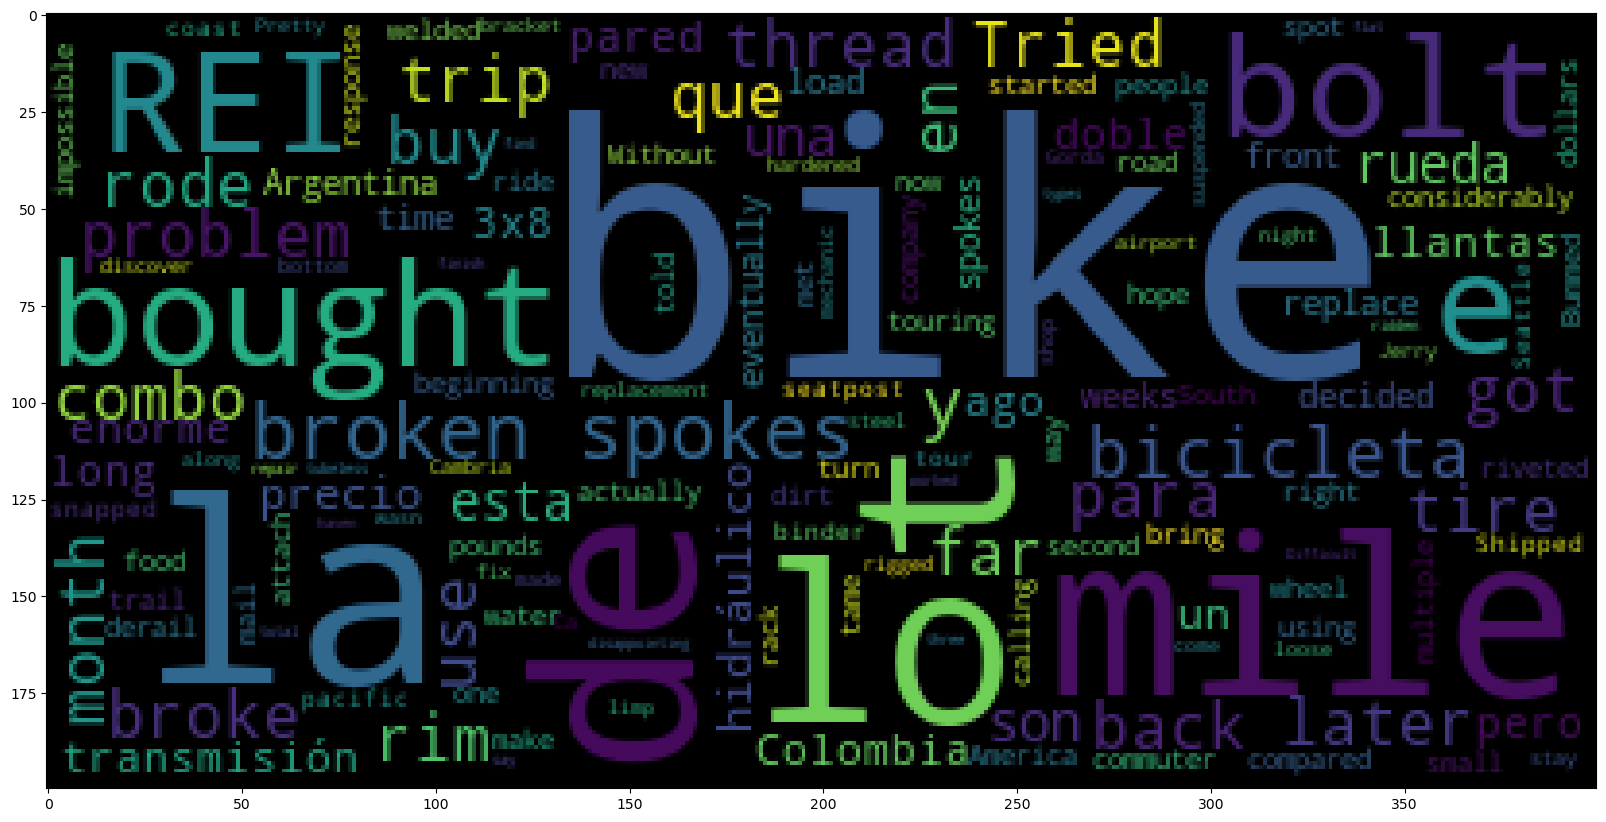

In [36]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

# TASK #6: TEXT DATA CLEANING 101

In [37]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Here we imported all the different punctuations
in the english language.


What we wanted to do is before we take our
verified reviews and feed it into our machine
learning model, we wanted to clean up the data first.
We wanted to remove all the punctuations from text first.


In [38]:
# Example
Test = '$I love data science &and making projects...!!!'

In [39]:
Test_punc_removed = [char for char in Test if char not in string.punctuation   ]
Test_punc_removed

['I',
 ' ',
 'l',
 'o',
 'v',
 'e',
 ' ',
 'd',
 'a',
 't',
 'a',
 ' ',
 's',
 'c',
 'i',
 'e',
 'n',
 'c',
 'e',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'm',
 'a',
 'k',
 'i',
 'n',
 'g',
 ' ',
 'p',
 'r',
 'o',
 'j',
 'e',
 'c',
 't',
 's']

In [40]:
# Join the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'I love data science and making projects'

The next thing we want to do is to remove what we call stopwords.
These are common words that don't add much value
when we train a machine learning model such as for example, __I__,
__you__, __we__, all these are genetic common words, we call
stopwords. It's a common practice to remove
these stopwords in machine learning projects.


In [41]:
import nltk # Natural Language tool kit

In [42]:
# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DONGY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [43]:
Test_for_stopwords = 'I have been enjoying these coding, programming and ML projects using jupyter notebook.'

In [44]:
Test_for_stopwords_clean = [word for word in Test_for_stopwords.split() if word.lower() not in stopwords.words('english')  ]

In [45]:
Test_for_stopwords_clean

['enjoying',
 'coding,',
 'programming',
 'ML',
 'projects',
 'using',
 'jupyter',
 'notebook.']

# TASK #7: PERFORM COUNT VECTORIZATION (TOKENIZATION)

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)


In [47]:
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'paper', 'second', 'the', 'third', 'this']


C:\Users\DONGY\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [48]:
print(X.toarray())

[[0 0 1 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]
 [0 0 1 1 0 1 0 1 0 1]]


- **Without doing any code, perform count vectorization for the following list:**
    -  mini_challenge = ['Hello World','Hello Hello World','Hello World world world']

In [49]:
mini_challenge = ['Hello World','Hello Hello World','Hello World world world']

vectorizer = CountVectorizer()
Y = vectorizer.fit_transform(mini_challenge)

In [50]:
print(vectorizer.get_feature_names())

['hello', 'world']


In [51]:
print(Y.toarray())

[[1 1]
 [2 1]
 [1 3]]


# TASK #8: CREATE A PIPELINE TO REMOVE PUNCTUATIONS, STOPWORDS AND PERFORM COUNT VECTORIZATION

In [52]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [ word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [53]:
# Let's test the newly added function
reviews_df_clean = reviews_df['Review'].apply(message_cleaning)

In [55]:
# show the original review
print(reviews_df['Review'][5])

I picked up this bicycle after my bike packing trip this fall through WV. I rode my rigid carbon hardtail for the trip and it was great but the lack of mounts left me looking for a secondary bicycle. The sale price Of this bicycle Made this purchase a no brainer. The mix of components, precision of the bar end shifters and the weight make is fun on the road, loaded up with Relevate Bags or riding single track. I picked a large frame as I’m 5’10” with a 32in inseam and it was a bit more upright and tight when in a saddle for my preference. Putting a Thompson setback seatpost fixed that minor issue. It’s perfect now. I was looking to buy a Kona Sutra LTD or Specialized gravel bike but for the money the ADV 3.2 was the way to go.


In [56]:
# show the cleaned up version
print(reviews_df_clean[5])

['picked', 'bicycle', 'bike', 'packing', 'trip', 'fall', 'WV', 'rode', 'rigid', 'carbon', 'hardtail', 'trip', 'great', 'lack', 'mounts', 'left', 'looking', 'secondary', 'bicycle', 'sale', 'price', 'bicycle', 'Made', 'purchase', 'brainer', 'mix', 'components', 'precision', 'bar', 'end', 'shifters', 'weight', 'make', 'fun', 'road', 'loaded', 'Relevate', 'Bags', 'riding', 'single', 'track', 'picked', 'large', 'frame', 'I’m', '5’10”', '32in', 'inseam', 'bit', 'upright', 'tight', 'saddle', 'preference', 'Putting', 'Thompson', 'setback', 'seatpost', 'fixed', 'minor', 'issue', 'It’s', 'perfect', 'looking', 'buy', 'Kona', 'Sutra', 'LTD', 'Specialized', 'gravel', 'bike', 'money', 'ADV', '32', 'way', 'go']


What I wanted to do next is I'm gonna apply agan
the same pipeline to do the count vectorizer
which is what we have done in Task 7.


In [58]:
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer=message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['Review'])

In [59]:
print(vectorizer.get_feature_names())

['1', '100', '1000', '1015', '105s', '10spd', '1100', '1140', '1142', '11spd', '1200', '12000', '14', '145', '15', '150', '1500', '16', '16mph', '18', '1finger', '1x', '2', '20', '200', '2017', '2018', '2019', '20mph', '25', '2500', '25000', '275', '28', '28mm', '29er', '2k', '3', '30', '300', '3000', '3035', '30cm', '32', '32in', '340', '35', '355', '35mph', '36', '3x7', '3x8', '400', '4022', '4024', '4030', '40mm', '42', '45', '5', '500', '50mm', '52CM', '55', '5’10”', '6', '60', '6000', '62', '650B', '650b', '6600', '67', '6’5280lbs', '7', '700c', '70s', '740', '780', '8', '80s', '95', 'ACL', 'ADV', 'AL', 'ALWAYS', 'ARD', 'Aggressive', 'Also', 'Although', 'Always', 'America', 'Andare', 'Anyway', 'Anyways', 'Apex', 'Area', 'Argentina', 'Aunque', 'Bags', 'Best', 'Bike', 'Bikes', 'Bought', 'Brake', 'British', 'Brooks', 'Bummed', 'CAAD8', 'COOP', 'Ca', 'Cabalgé', 'Cairo', 'Calificé', 'California', 'Cambria', 'Cannondale', 'Capo', 'Carries', 'Ce', 'Central', 'Cette', 'Charge', 'Città', '

These are all the different unique
names that I have in my count vectorizer.
So we see here these are all the different
unique ones in the entire corpus in every single review
that every single customer has.
These are all the different words and if we print these
to array, we end up with a bunch of numbers.


In [60]:
print(reviews_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


These numbers are the numbers
that we're going to use to train our machine learning model.
This is simply the tokenized version of the entire text data
that I have for all customers.

In [61]:
reviews_countvectorizer.shape

(90, 1803)

And here we have the shape which is 90 reviews
and we have around 1803 columns. That's a large amount of data set.


In [62]:
# Convert array to dataframe
reviews = pd.DataFrame(reviews_countvectorizer.toarray())

Then we take
the reviews and put it in X.
That simply is going to be my inputs to the model.

In [63]:
X = reviews

In [64]:
X

,0,1,2,3,4,5,6,7,8,9,...,1793,1794,1795,1796,1797,1798,1799,1800,1801,1802
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
86,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,1,1,0,0,0
87,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


And the output from my model is what I will use to predict the sentiment. I just wanted to see if the customers are
happy or not.

In [65]:
y = reviews_df['Sensitivity']
y

0     positive
1     positive
2     positive
3     positive
4     positive
        ...   
85     neutral
86     neutral
87    positive
88    negative
89    positive
Name: Sensitivity, Length: 90, dtype: object

__X__ is the inputs and __y__ is the outputs. Which is a bunch of zeros and ones
that indicates the output for my model. So now we are ready to train a naive based
classified model.


In [66]:
# Apply the describe method to get statistical summary
reviews_df.describe()

,ProductID,Stars,Length
count,90.000000,90.000000,90.000000
mean,534.422222,4.033333,498.644444
std,78.665267,1.275966,359.489285
min,392.000000,1.000000,56.000000
25%,513.000000,4.000000,277.750000
50%,535.000000,4.500000,440.000000
75%,559.000000,5.000000,590.000000
max,659.000000,5.000000,1839.000000


- **What is the shape of X and Y**

In [67]:
X.shape

(90, 1803)

In [68]:
y.shape

(90,)

The result of the __X.shape__ shows we have 90 rows and 1803 columns.

The result of the __y.shape__ shows we have 90 outputs. That makes sense because every single text data, every single row
has a simple output corresponding to it as well.

# TASK #9: TRAIN AND TEST NAIVE BAYES CLASSIFIER MODEL

And now we're pretty much ready to go ahead and train our
model. So the first step that we want to do is that we want
to divide our data sets into training and testing.
So in general when we train any machine learning model we use
most of the data set perhaps around let's say 80% of the data
to train our model. And then the remaining 20% we use them
for testing.
And this is very important to make sure that our model is not
overfitting the training data. Meaning the model still
performs quite well even if the data has never been seen
by the model before.
And that's why the actual true assessment of the model is
on the testing data set which is new, unique dataset.


In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

And then next let's import MultinomialNB. After I imported my class, I'm going to instantiate
an object out of my class.


In [70]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)


MultinomialNB()

So now our model has been successfully trained and now I'm
ready to assess or test our model
performance.

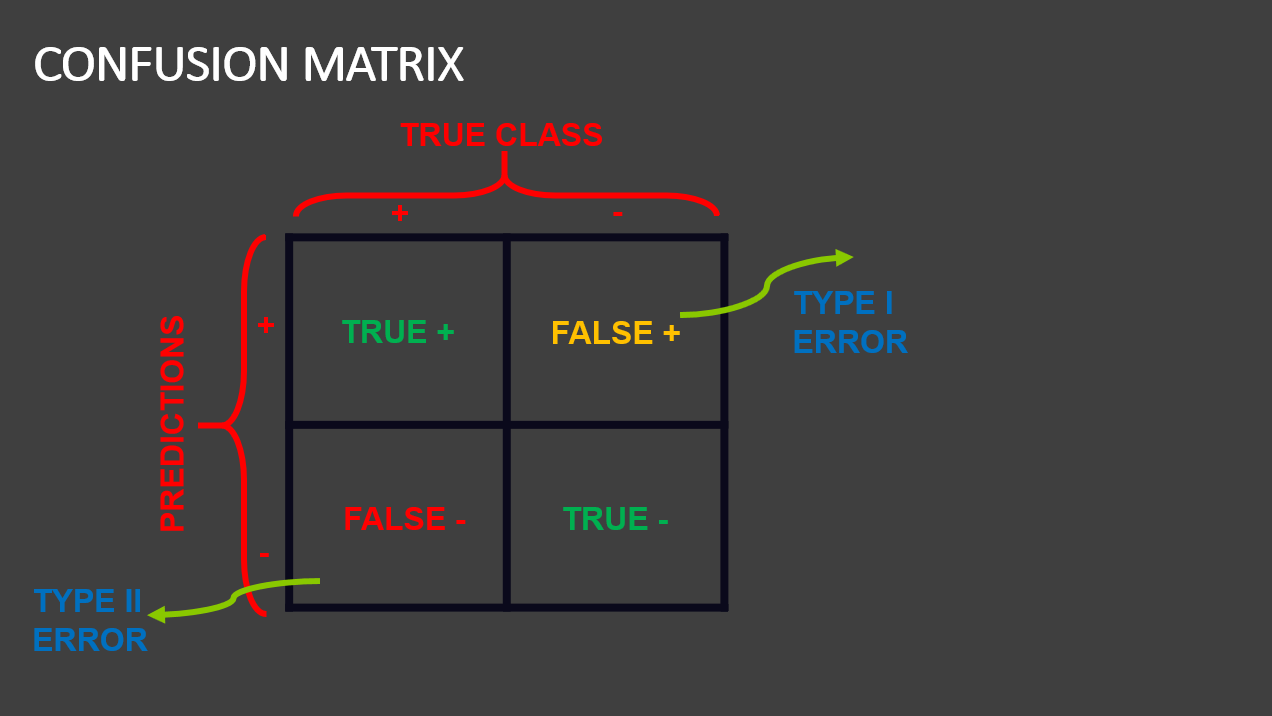

In [71]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot: >

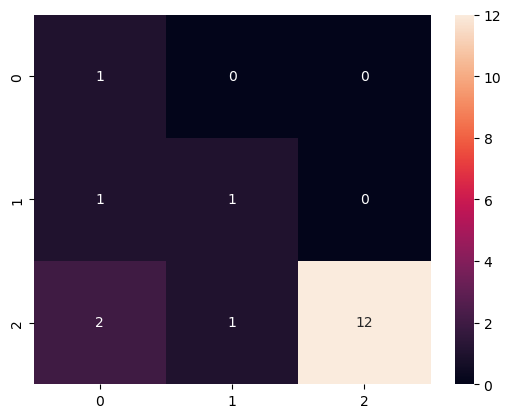

In [72]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [73]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

    negative       0.25      1.00      0.40         1
     neutral       0.50      0.50      0.50         2
    positive       1.00      0.80      0.89        15

    accuracy                           0.78        18
   macro avg       0.58      0.77      0.60        18
weighted avg       0.90      0.78      0.82        18



- **Train a logistic Regression classifier and assess its performance**

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00         1
     neutral       1.00      0.50      0.67         2
    positive       0.94      1.00      0.97        15

    accuracy                           0.94        18
   macro avg       0.98      0.83      0.88        18
weighted avg       0.95      0.94      0.94        18



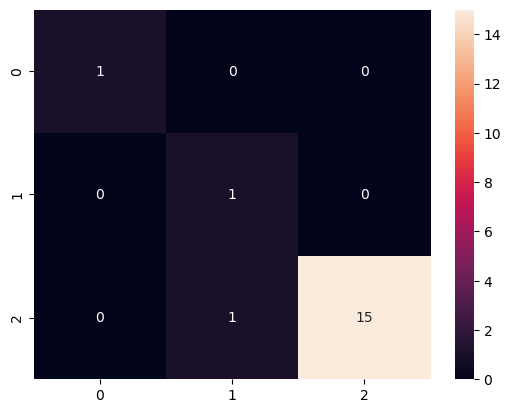

In [74]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))